# Python Lab 1: Sentiment Identification


# Student Name:

# 1. Background
A large multinational corporation is seeking to automatically identify the sentiment that their customer base talks about on social media. They would like to expand this capability into multiple languages. Many 3rd party tools exist for sentiment analysis, however, they need help with under-resourced languages.

# 2. Goal
Train a sentiment classifier (Positive, Negative, Neutral) on a corpus of the provided documents.
Here are the goals:

    a. Maximize Accuracy
    b. Accurately detect negative sentiment
    


# Table of Contents
1. Background
2. Goal
3. Source Data
4. Applied Methodology 
5. Assignment Guidelines
6. Conclusions and Recommendations

# 3. Source Data
Dataset will be imported from the following link.

• Link: http://archive.ics.uci.edu/ml/datasets/Roman+Urdu+Data+Set

# 4. Applied Methodology

There following are the approached methodology used to mined the dataset to meet the business goal.

    a.	Data Summary
    b.	Data Cleansing 
    c.	Data Wrangling
    d.	Data Validation
    e.	Data Visualization
    f.	Basic Text Mining 
    g.	Multiple Models Application
    
Note: Outline 4b to 4e will be applied to each variable.

# 4a. Data Summary

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'


# 5. Assignment Guidelines:
  
    1.	Take 70% of the data as training at random and the rest of the data set aside as test data.
    2.	Now train the following models on the 70% of the data and test on the remaining test data.
            a)	Logistic Regression (Completed by me, with 80% training dataset, change yours to 70%)
            b)	Support Vector Machine
            c)	Decision Tree 
            d)	Random Forest
    3.	Compare performance of the four models: which one has higher accuracy on the training and test sets?
    4.	Make a short conclusion(s)/recommendation(s).


In [2]:
#Step 1: Import Data from Source Link
data_link = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00458/Roman%20Urdu%20DataSet.csv'
Raw_Data = pd.read_csv(data_link)
Raw_Data.head()

,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Unnamed: 2
0,sahi bt h,Positive,NaN
1,"Kya bt hai,",Positive,NaN
2,Wah je wah,Positive,NaN
3,Are wha kaya bat hai,Positive,NaN
4,Wah kya baat likhi,Positive,NaN


In [3]:
# Step 2: Add variable names becuase raw data was missing variable names.
Raw_Data = pd.read_csv(data_link , names=["Customer_Comment", "Sentiment_Classifier", "Flag"])
Raw_Data.head(2)

,Customer_Comment,Sentiment_Classifier,Flag
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN


# Step 4b-4e (i): Flag Field

In [4]:
Raw_Data.groupby("Flag")["Flag"].count()

Flag
------              1
-------             1
----------          1
----------------    1
9090                1
till here           2
Name: Flag, dtype: int64

# Apply Outline 4b to 4e to each field.

In [5]:
## Removed Flag field, looks like it is an extraneous variable as per the business objective.
Raw_Data_1 = Raw_Data[["Customer_Comment", "Sentiment_Classifier"]]
Raw_Data_1.head(2)

,Customer_Comment,Sentiment_Classifier
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


# Step 4b-4e (ii): Sentiment_Classifier field

In [6]:
Raw_Data_1.groupby("Sentiment_Classifier")["Sentiment_Classifier"].count()

Sentiment_Classifier
Neative        1
Negative    5286
Neutral     8929
Positive    6013
Name: Sentiment_Classifier, dtype: int64

In [7]:
Raw_Data_1['Sentiment_Classifier'] = Raw_Data_1['Sentiment_Classifier'].replace('Neative', 'Negative')
Raw_Data_1.head(2)

,Customer_Comment,Sentiment_Classifier
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


In [8]:
# Validate Data
Raw_Data_1.groupby("Sentiment_Classifier")["Sentiment_Classifier"].count()

Sentiment_Classifier
Negative    5287
Neutral     8929
Positive    6013
Name: Sentiment_Classifier, dtype: int64

<Axes: xlabel='Sentiment_Classifier'>

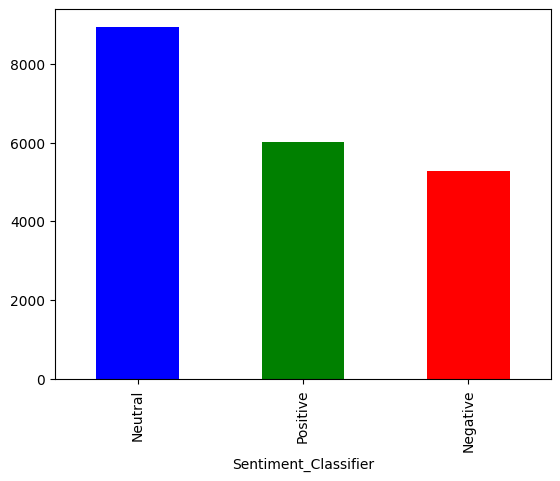

In [9]:
# Visualize Data
import matplotlib.pyplot as plt
Raw_Data_1['Sentiment_Classifier'].value_counts().plot(kind='bar' ,color=['blue', 'green', 'red'])


# Step 4b-4e (ii): Customer_Comment field

In [10]:
# Confirm if there is missing Data
print(Raw_Data_1.isnull().sum())

Customer_Comment        1
Sentiment_Classifier    0
dtype: int64


In [11]:
##This shows that there is at least one within Customer_Comment field, so let remove them.
Raw_Data_2 = Raw_Data_1[pd.notnull(Raw_Data_1["Customer_Comment"])]
Raw_Data_2.head()


,Customer_Comment,Sentiment_Classifier
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


In [12]:
# Confirm if there is missing Data
print(Raw_Data_2.isnull().sum())

Customer_Comment        0
Sentiment_Classifier    0
dtype: int64


In [13]:
# Convert data to lower case, trim leading and trailing white spaces.

In [14]:
# lower case
Raw_Data_2['Customer_Comment'] = Raw_Data_2['Customer_Comment'].str.lower()
Raw_Data_2.head(2)

,Customer_Comment,Sentiment_Classifier
0,sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


In [15]:
# Apply the strip operation column-wise
Raw_Data_2 = Raw_Data_2.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

Raw_Data_2.head(2)

,Customer_Comment,Sentiment_Classifier
0,sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive


In [16]:
# NOTE: I am going to stop working on the Customer_Comment field here, 
#       but there are other text mining approaches that could be performed on it.
# Example is to create a token to remove stop words, or even visualize 
# the most popular words using the wordcloud package e.t.c.
# Also consider the emojis within the field could be another thing to work on.
# But I will skip all these, and just move to the step of preparing my dataset for the model.
#*************************************************************************************
####### PS: Stop words may be difficult here though since this language is not English 
#######     or any popular language that has been saved already on the stop words list.

# 4f. Basic Text Mining 

In [17]:
#Creating a corpus of the review text for initializing TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics

In [18]:
#  DataFrame named "Raw_Data_2" with columns including "Sentiment_Classifier"
X = Raw_Data_2['Customer_Comment'] 
# Create the target variable (Y)
Y = Raw_Data_2['Sentiment_Classifier']

# Create the tf-idf feature matrix
tfidf_vectorizer = TfidfVectorizer()  # You may need to set additional options
X = tfidf_vectorizer.fit_transform(X)

In [19]:
#import sklearn.metrics
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Divide Model Data into two dataset, Train and Test Data
•	Train Data: 80% 
•	Test Data: 20%

# 4g.    Multiple Models Application - Example

# Logistic Regression

In [20]:
#from sklearn import linear_model
#from sklearn.linear_model import LogisticRegression

#Set up Logistic Regression
######Note: You can decide to use the default setting
#####Logreg_setup= LogisticRegression() with a random_state=0 for reprocible results
#Logreg_setup= LogisticRegression(penalty='l2', solver='newton-cg', random_state=0)

# fit the model with data)
#Logreg_model=Logreg_setup.fit(x_train, y_train)

#Test model performance
#Logreg_pred=Logreg_setup.predict(x_test)

#Evaluate the Model performance,

#Logreg_ascore=sklearn.metrics.accuracy_score(y_test, Logreg_pred)

#print ("Accuracy Score of Logistic Regression is: %f" %(Logreg_ascore))

# * Student Assignment *

# 5. Assignment Guidelines:
  
    1.	Take 70% of the data as training at random and the rest of the data set aside as test data.
    2.	Now train the following models on the 70% of the data and test on the remaining test data.
            a)	Logistic Regression (Completed by me, with 80% training dataset, change yours to 70%)
            b)	Support Vector Machine
            c)	Decision Tree 
            d)	Random Forest
    3.	Compare performance of the four models: which one has higher accuracy on the training and test sets?
    4.	Make a short conclusion(s)/recommendation(s).


# 4g.    Multiple Models Application

# Solution to Question 2: Now train the following models on the 70% of the data and test on the remaining test data.

# a) Logistic Regression


In [21]:
# We'll start by splitting the dataset into 70% training and 30% testing.")

In [22]:
from sklearn.model_selection import train_test_split
# We assume X and Y are our features and labels
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)


In [23]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

# Set up Logistic Regression with 70% train data
Logreg_setup = LogisticRegression(penalty='l2', solver='newton-cg', random_state=0)
Logreg_model = Logreg_setup.fit(x_train, y_train)

# Test model performance
Logreg_pred = Logreg_setup.predict(x_test)

# Evaluate the Model performance
Logreg_ascore = sklearn.metrics.accuracy_score(y_test, Logreg_pred)
print("Accuracy Score of Logistic Regression is: %f" % (Logreg_ascore))


Accuracy Score of Logistic Regression is: 0.645246


# b) Support Vector Machine


In [24]:
from sklearn.svm import SVC

# Set up Support Vector Machine
SVM_setup = SVC(kernel='linear', random_state=0)
SVM_model = SVM_setup.fit(x_train, y_train)

# Test model performance
SVM_pred = SVM_setup.predict(x_test)

# Evaluate the Model performance
SVM_ascore = sklearn.metrics.accuracy_score(y_test, SVM_pred)
print("Accuracy Score of Support Vector Machine is: %f" % (SVM_ascore))


Accuracy Score of Support Vector Machine is: 0.651343


# Solution to Question 1: Take 70% of the data as training at random and the rest of the data set aside as test data.

# c) Decision Tree 


In [25]:
from sklearn.tree import DecisionTreeClassifier

# Set up Decision Tree
DT_setup = DecisionTreeClassifier(random_state=0)
DT_model = DT_setup.fit(x_train, y_train)

# Test model performance
DT_pred = DT_setup.predict(x_test)

# Evaluate the Model performance
DT_ascore = sklearn.metrics.accuracy_score(y_test, DT_pred)
print("Accuracy Score of Decision Tree is: %f" % (DT_ascore))


Accuracy Score of Decision Tree is: 0.533366


# d) Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier


# Set up Random Forest
RF_setup = RandomForestClassifier(random_state=0)
RF_model = RF_setup.fit(x_train, y_train)

# Test model performance
RF_pred = RF_setup.predict(x_test)

# Evaluate the Model performance
RF_ascore = sklearn.metrics.accuracy_score(y_test, RF_pred)
print("Accuracy Score of Random Forest is: %f" % (RF_ascore))


Accuracy Score of Random Forest is: 0.612292


# Solution to Question 3: Compare performance of the four models: which one has higher accuracy on the training and test sets?

In [29]:
print("# Based on the provided accuracy scores:\n\n# Support Vector Machine (SVM) has the highest accuracy on the test set.")


# Based on the provided accuracy scores:

# Support Vector Machine (SVM) has the highest accuracy on the test set.


# 6. Conclusions and Recommendations

In [30]:
print("# Recommendation: Choose Support Vector Machine (SVM) for the most reliable predictions. If you prefer simpler explanations, consider Logistic Regression.")


# Recommendation: Choose Support Vector Machine (SVM) for the most reliable predictions. If you prefer simpler explanations, consider Logistic Regression.
